# Project-Phase 2 


# Titanic Survival Rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

# The Titanic dataset has 891 rows and 12 columns.
Columns include PassengerId, PClass, Name, Sex, Age, Sibsp, Parch, Ticket, Fare, Cabin, Embarked. All these are the independendent variables and Survived is the dependent variables, which we have to predict if the person survived or not. 
So here it is a binary classification, either alive (1) or dead(0). It can be termed as a binary classification based problem, randomforest classifier and other classifiers can be used on the basis of prediction. Since it is yes/no in terms of numbers 1 or 0, we can apply LogisticRegression and other models.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above information, we can identify 3 datatypes, i.e., integer, float and object datatypes. memory usage is 83.7+ KB.

In [7]:
df.columns.to_list() # converting columns to a list format.

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [134]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can notice that age column has 177 null values and cabin column has 687 null values. Also Embarked
has 2 null values present in it.

In [8]:
df.isnull().sum().sum()

866

The total sum of nan values is 866 in the whole dataset.

<AxesSubplot:>

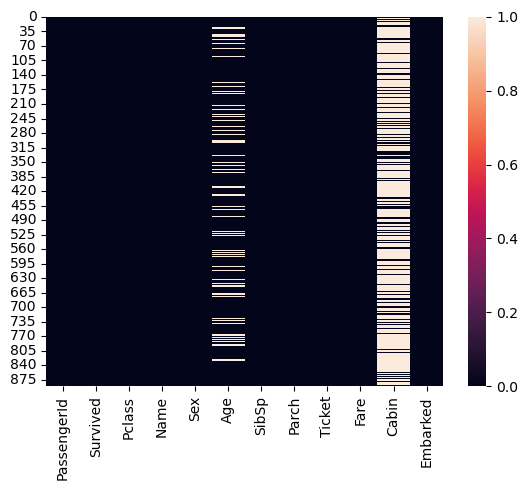

In [9]:
sns.heatmap(df.isnull()) 

It is clearly visible in the Age column, there are few null values and majority nan values in Cabin feature.

In [10]:
#Checking value_counts of each column
for i in df.columns:
    print(df[i].value_counts)
    print("\n")

<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                        

From the above, we can observe that each column has specific datatype but the age and cabin features show Nan values, again age
is float datatype and cabin is object type. So there no widespaces in these or other features of the dataset.

# Removing Nan values using mean and mode 

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [12]:
df.Embarked.mode()#since embarked is categorical data, we use mode.

0    S
Name: Embarked, dtype: object

In [14]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [112]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Here one can check that Age feature now shows no null values as these are filled with mean of the Age column. Embarked column also is filled with mode (more frequently occuring value)

The Cabin feature has 687 NaN values, so we cannot replace it with mean as majority rows have NaN values, so further in the 
EDA process, am going to remove this column as it has no importance in the suvival rate or even if it has, there is vague 
information here.

# Statistical summary observations:

In [15]:
df.describe() #Statistical summary observations:

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Statistical summary observations:
1.  There are no negative values in the describe method, which means summary is excellent.
    All the rows are equal. No missing values.
2.  Mean is greater then median (right skewed) in SibSp, Parch and Fare. Pclass has mean less than         median which will be slightly left skewed as difference is less.    
3.  There are outliers in PassengerID, Age, SibSp, Parch, and Fare columns.
4.  This method shows the standart deviation in Age and SibSp and Fare columns.
5.  We can also note min and 25th percential values also.

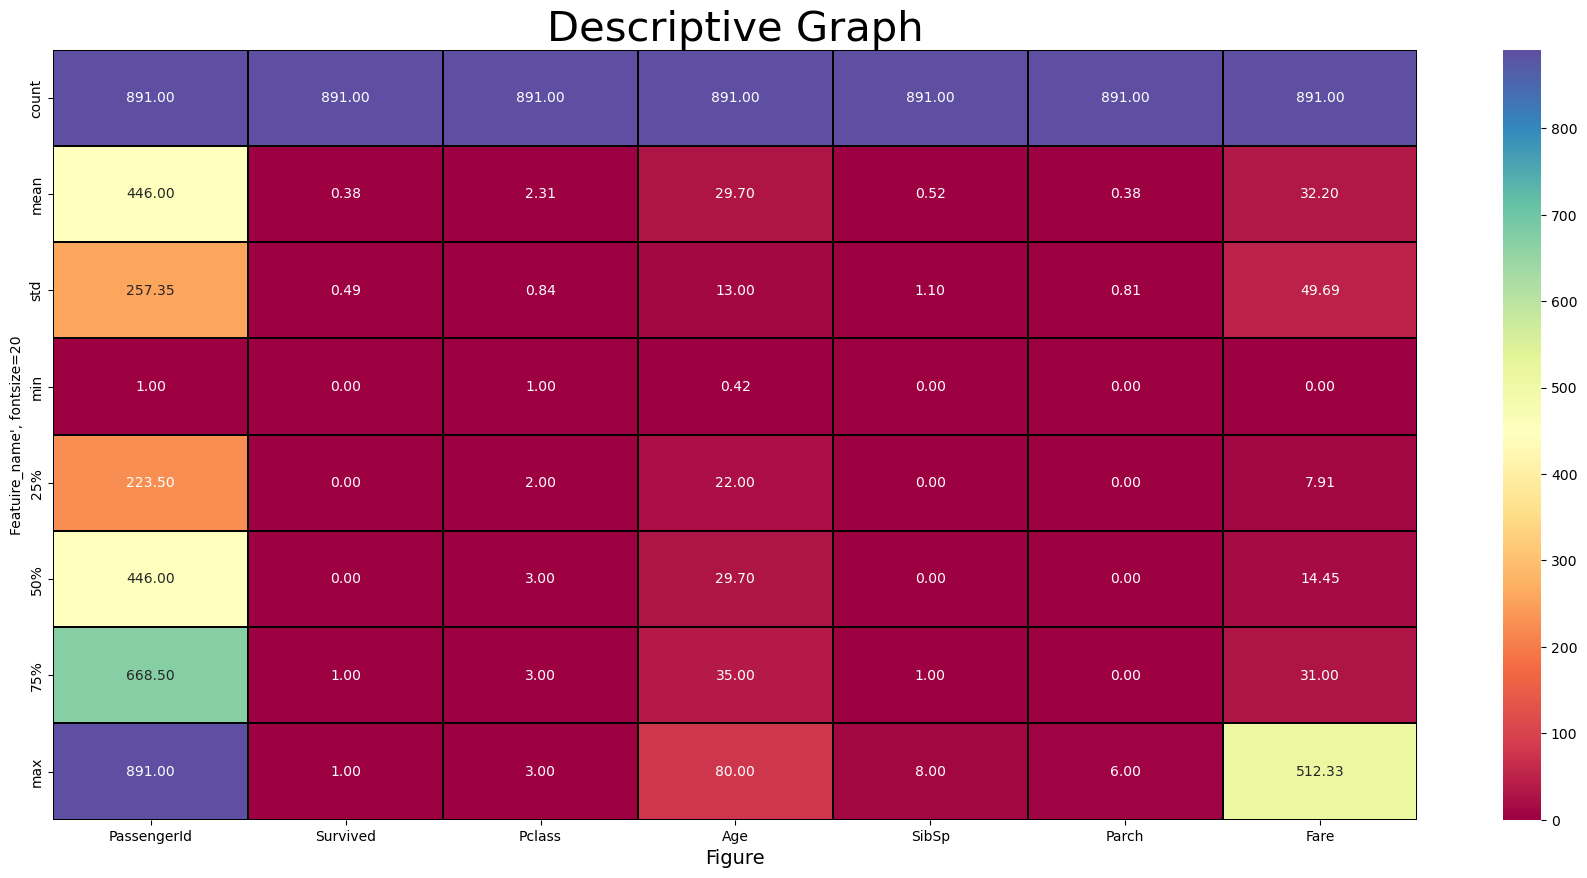

In [10]:

plt.figure(figsize=(22, 10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel("Featuire_name', fontsize=20")
plt.title("Descriptive Graph", fontsize=30)
plt.show()


The heatmap also shows the same statistical descriptions as in describe() method. 

In [16]:
#checking categorical values
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:", categorical_col)
    

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [17]:
#checking numberical values
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:", numerical_col)

Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# GRAPHICAL EDA PROCESS

# Univariate Analysis

Countplots:

Text(0.5, 1.0, 'Survival=1, Not-survived=0')

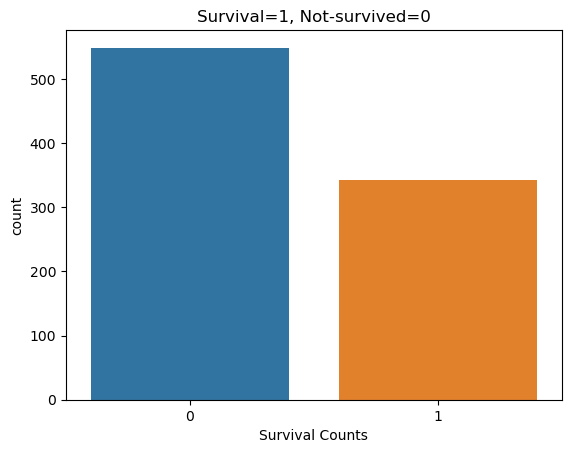

In [18]:
sns.countplot(x="Survived", data=df)
plt.xlabel("Survival Counts")
plt.title("Survival=1, Not-survived=0")

The countplot for survival which is our label, shows that those who survived are less(indicated by 1) and those who died are 
more in number(0). So we can infer that there is bias or imbalance in this column.


Text(0.5, 1.0, 'Male/Female')

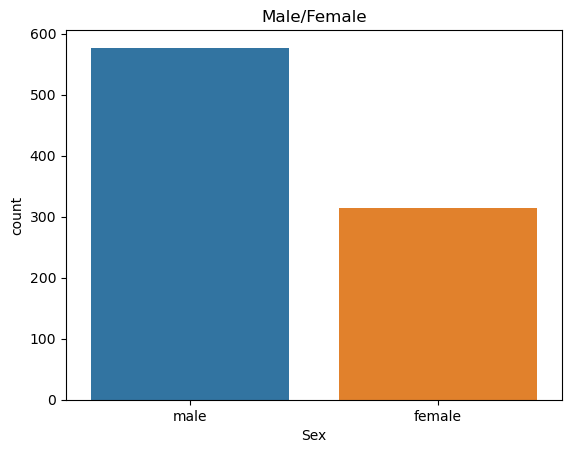

In [19]:
sns.countplot(x="Sex", data=df)
plt.xlabel("Sex")
plt.title("Male/Female")

Again we can see that females were less compared to males. So here there is again class imbalance.

Text(0.5, 1.0, 'Parents/Children Count')

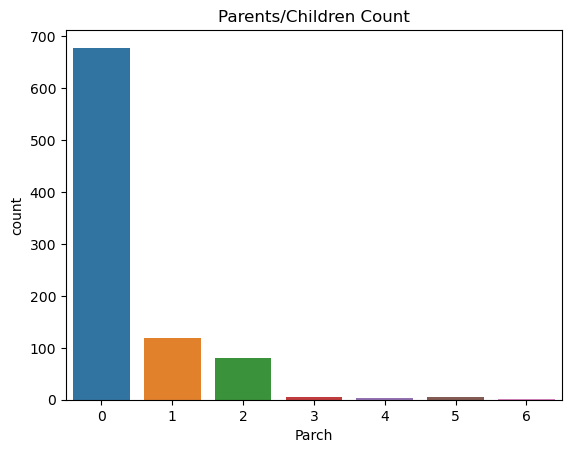

In [20]:
sns.countplot(x="Parch", data=df)
plt.xlabel("Parch")
plt.title("Parents/Children Count")

Highest count for 0 indicates majority of the passengers did not have spouses or children and
1 and 2 represent spouses or children, which were less.  

Text(0.5, 1.0, 'The area from which passengers left')

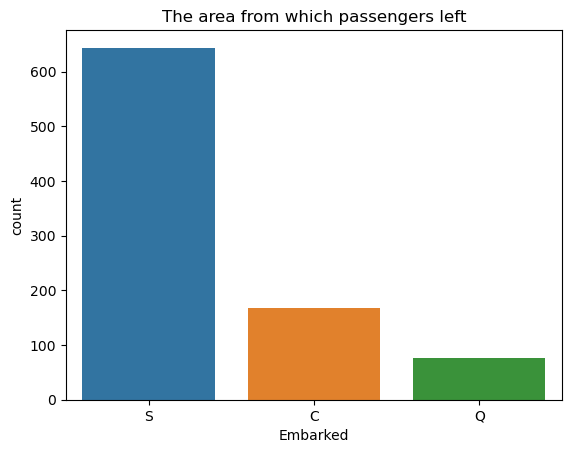

In [20]:
sns.countplot(x="Embarked", data=df)
plt.xlabel("Embarked")
plt.title("The area from which passengers left")

Here Southampton port had majority of passengers embarking and Queenstown and Cherbourg had lesser
passengers.

Text(0.5, 1.0, 'Siblings Sp')

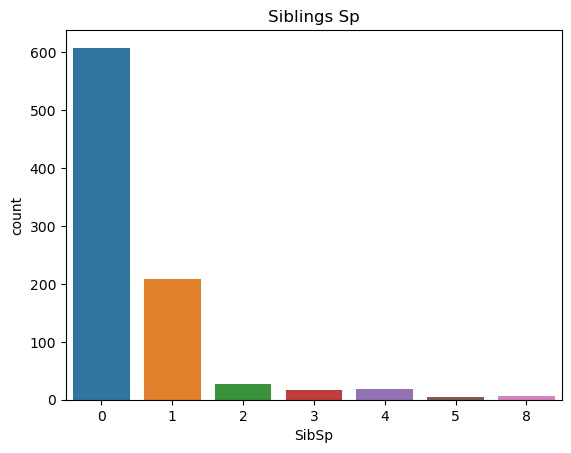

In [11]:
sns.countplot(x="SibSp", data=df)
plt.xlabel("SibSp")
plt.title("Siblings Sp")

Here also, those who did not have siblings or spouses were high compared to who had.

Text(0.5, 1.0, 'Different Classes')

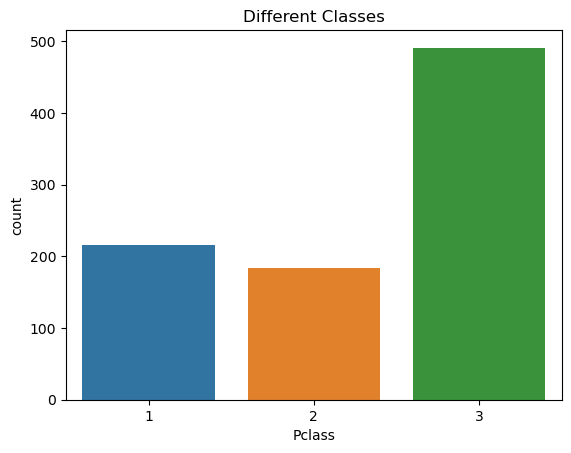

In [12]:
sns.countplot(x="Pclass", data=df)
plt.xlabel("Pclass")
plt.title("Different Classes")

The graph shows that there were 3 class altogether, 1, 2 and 3rd class and 3rd class had maximum passengers. So, we can get an idea that majority of them could not have got the previlages of escaping while the ship was sinking.

# Violinplots

<AxesSubplot:xlabel='Fare'>

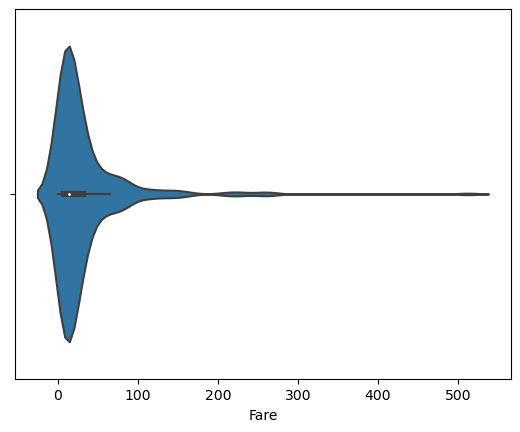

In [13]:
sns.violinplot(x='Fare', data =df)

We can conclude from this graph that people who had opted for high fare and lowest fares were less when compared to
the middle range of fare. 

# Histogram

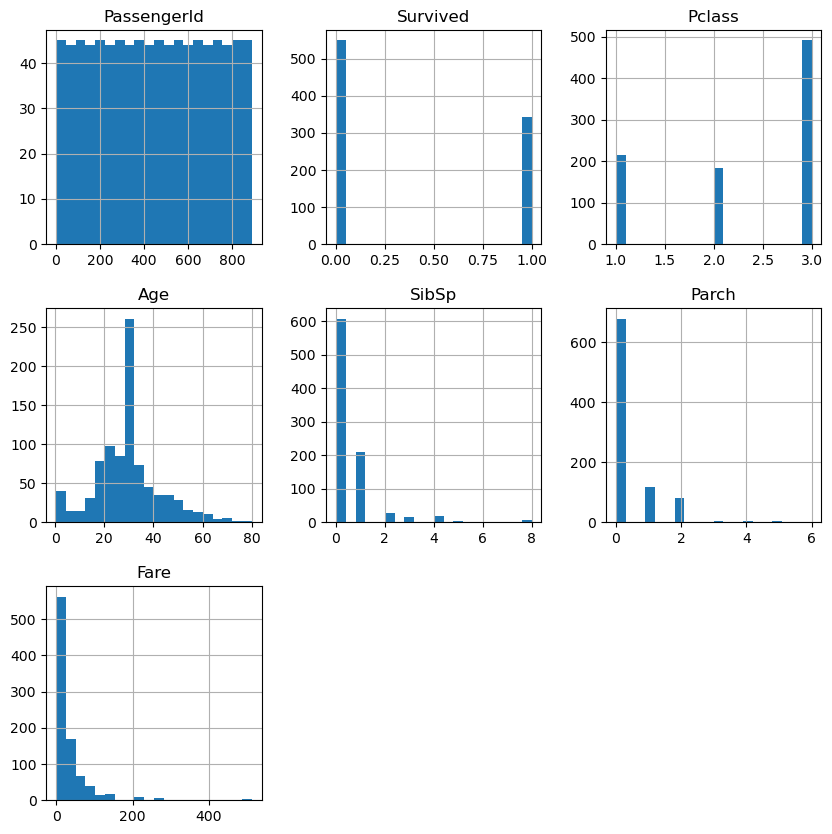

In [29]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Histogram plot shows that Pclass is left skewed, SibSp, Parch and Fare have right skewed curves.

# Boxplots

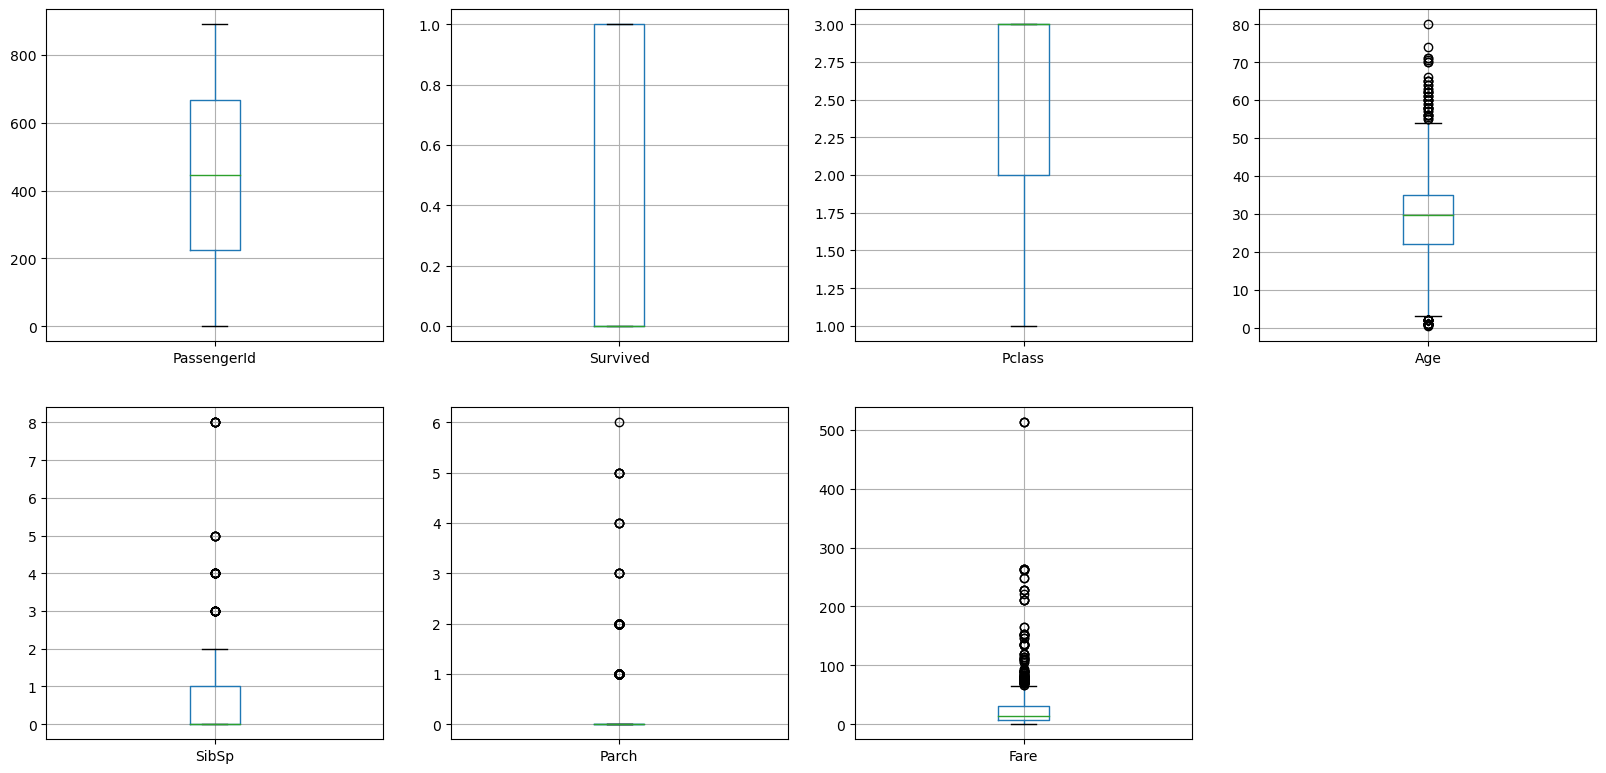

In [15]:
plt.figure(figsize=(20, 25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5, 4 , p)
        df.boxplot([i])
    p+=1
plt.show()

We can see outliers in Age, SibSp, Parch, and Fare columns. We can try to reduce outliers from Fare column.

# Calculating zscore

In [21]:
out_features=df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(out_features)) 
z

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.730108,0.789272,0.827377,0.592481,0.432793,0.473674,0.502445
1,1.726220,1.266990,1.566107,0.638789,0.432793,0.473674,0.786845
2,1.722332,1.266990,0.827377,0.284663,0.474545,0.473674,0.488854
3,1.718444,1.266990,1.566107,0.407926,0.432793,0.473674,0.420730
4,1.714556,0.789272,0.827377,0.407926,0.474545,0.473674,0.486337
...,...,...,...,...,...,...,...
886,1.714556,0.789272,0.369365,0.207709,0.474545,0.473674,0.386671
887,1.718444,1.266990,1.566107,0.823344,0.474545,0.473674,0.044381
888,1.722332,0.789272,0.827377,0.000000,0.432793,2.008933,0.176263
889,1.726220,1.266990,1.566107,0.284663,0.474545,0.473674,0.044381


In [27]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [28]:
z.iloc[13, 5]

5.73284383018578

In [24]:
df1=df[(z<3).all(axis=1)] #applying zscore for all the values less than 3.

In [25]:
df1.shape

(820, 12)

In [27]:
df.shape

(891, 12)

In [28]:
print("Old DataFrame:", df.shape[0])
print("New DataFrame:", df1.shape[0])
print("Dataloss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old DataFrame: 891
New DataFrame: 820
Dataloss percentage: 7.968574635241302


There is 7% dataloss here.

In [29]:
df=df1

# The name column does not contribute to the data but we can draw insights from the name column.


In [23]:
df['Name'].sample(5)

42              Kraeff, Mr. Theodor
734    Troupiansky, Mr. Moses Aaron
514               Coleff, Mr. Satio
252       Stead, Mr. William Thomas
568             Doharr, Mr. Tannous
Name: Name, dtype: object

In [30]:
import regex as re
pattern='\s(\w+)\.'
all_ts=df['Name'].str.extract(pattern, expand=False)
unique_ts=all_ts.value_counts()


In [31]:
unique_ts

Mr          494
Miss        163
Mrs         111
Master       26
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Name: Name, dtype: int64

We can see here different categories of passengers. There are 494 males with Mr as title along with
7 Dr titles and others noted in the list above.  We have 163 Miss and 111 Mrs titles and 26 Masters etc. 

# Bivariate analysis

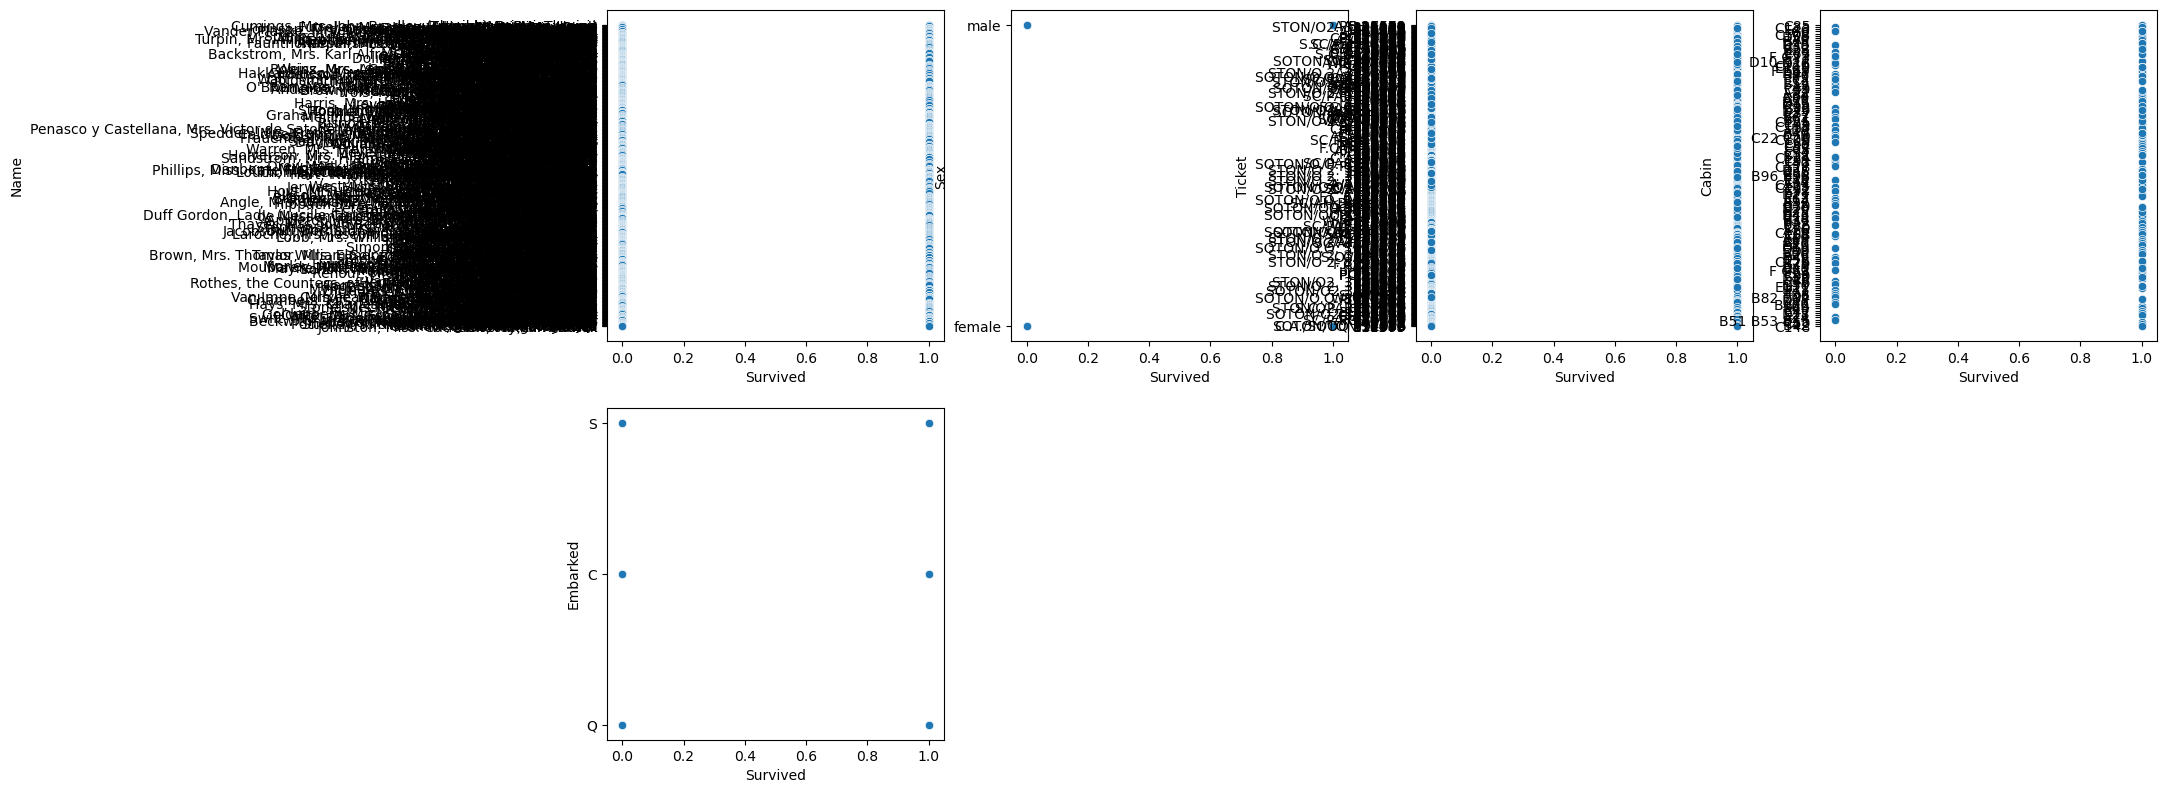

In [32]:
plt.figure(figsize=(20, 25))
p=1
for i in categorical_col:
    if p<=13:
        plt.subplot(5, 4 , p)
        sns.scatterplot(x='Survived', y=i, data=df, palette ='bright')
        plt.xlabel('Survived')
        plt.ylabel(i)
    p+=1
plt.show()



The scatterplot shows just the categorical data which is scattered.

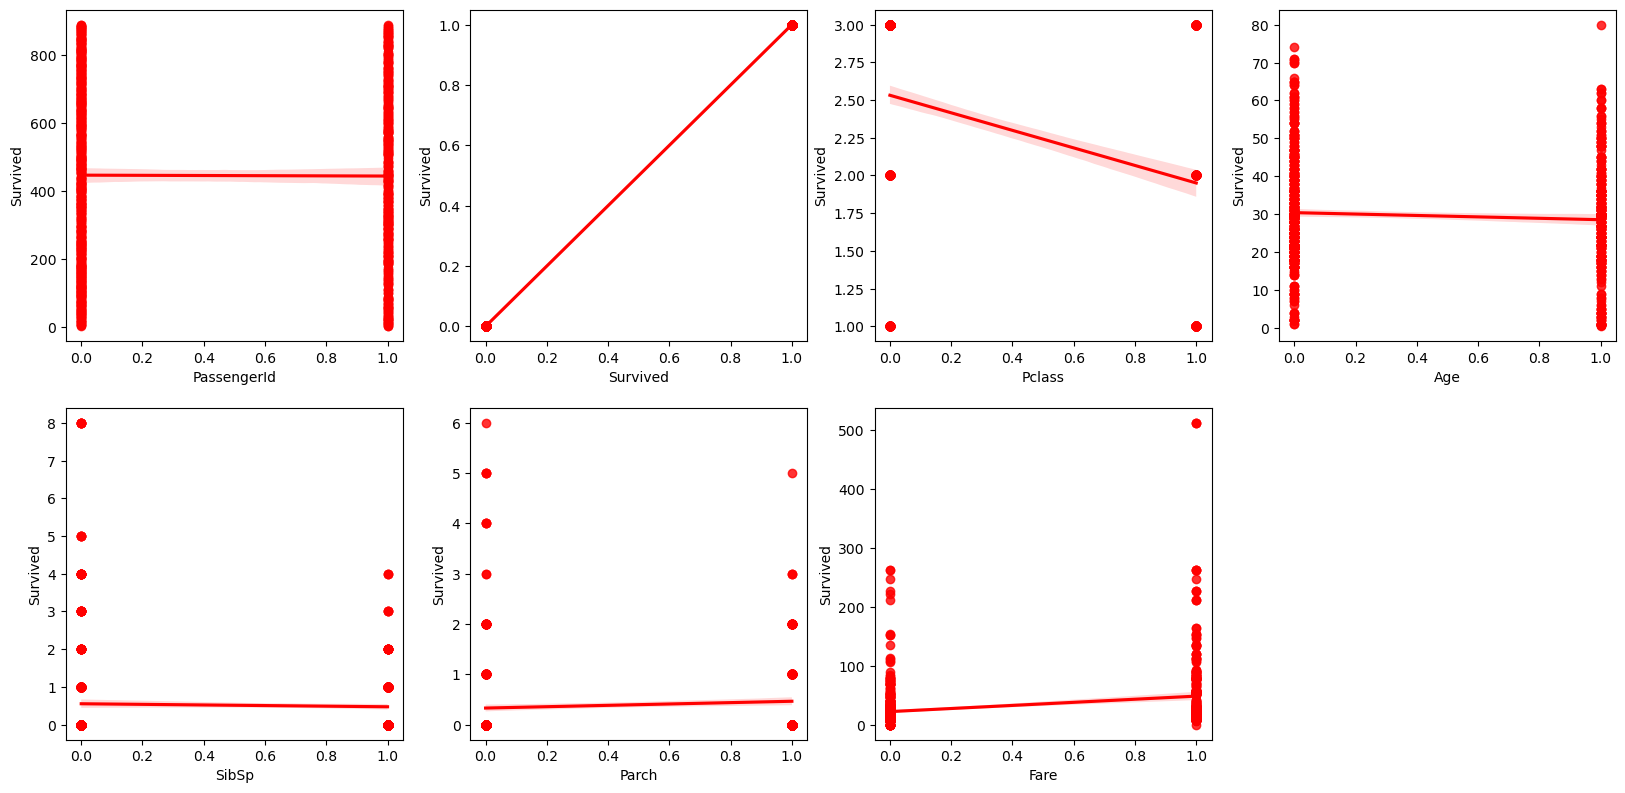

In [281]:
plt.figure(figsize=(20, 25))
p=1
for i in df[numerical_col]:
    if p<=13:
        plt.subplot(5,4,p)
        sns.regplot(x='Survived',y = i, data=df, color='r')
        plt.xlabel(i)
        plt.ylabel('Survived')
    p+=1
plt.show()

The regplot shows that if Pclass was less (1), surivival rate was more and less as it increased
Age column shows neutral position, sibsp and parch have similar trands. Fare shows slightly positive
survival rate as it increased

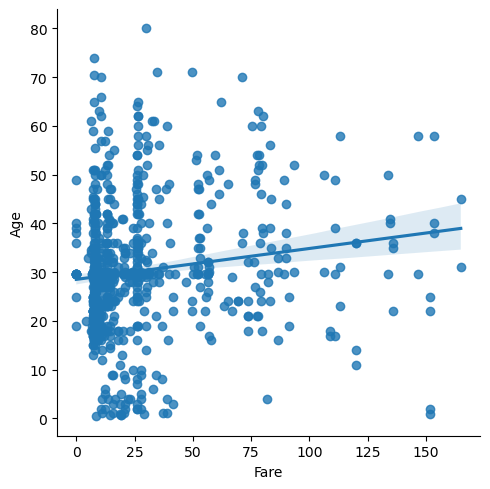

In [104]:
sns.lmplot(x='Fare', y='Age', data=df, palette='colorblind')

There is a positive correlation between age and fare.  

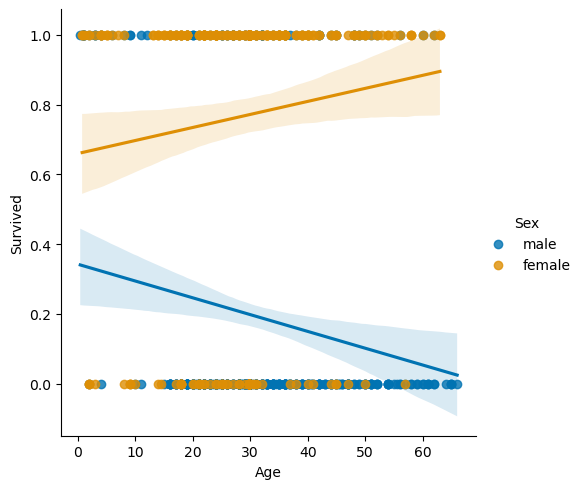

In [101]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=df, palette='colorblind')

The graph shows that overall females of any age had a highter survival rate. 
But we can see that for males, as age increased, the survivial rate decreased. 

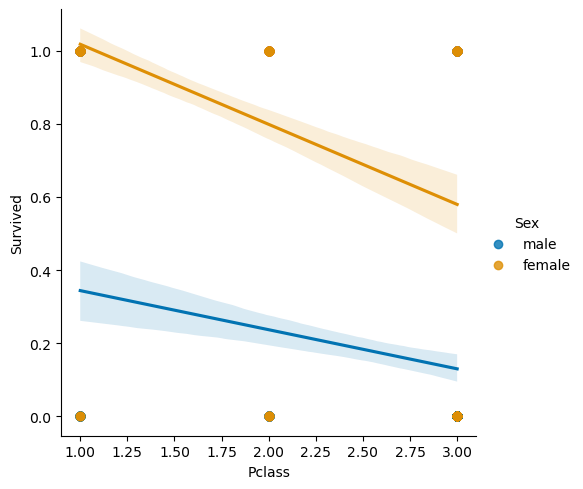

In [120]:
sns.lmplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='colorblind')

The plot shows that 1st class increased chances of survival as compared to 2nd and 3rd classes.
Here both the categories of sex have a similar plot.

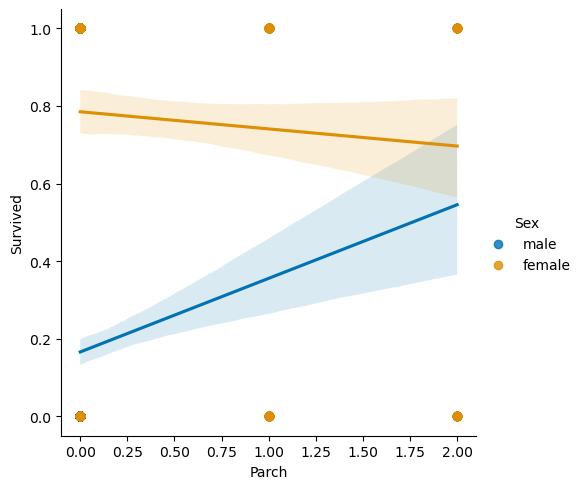

In [103]:
sns.lmplot(x='Parch', y='Survived', hue='Sex', data=df, palette='colorblind')

The graph shows male and female counterparts with repsect to parents and children

<AxesSubplot:xlabel='Survived', ylabel='count'>

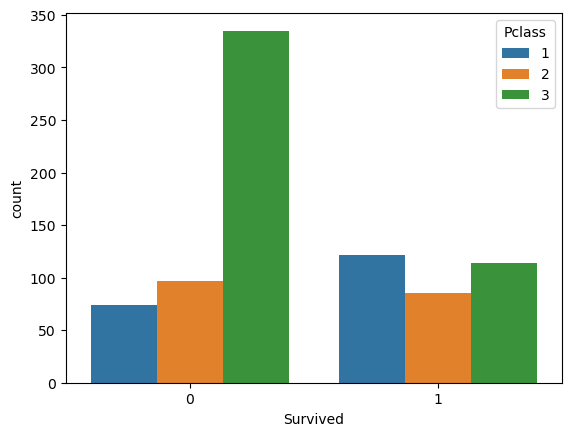

In [105]:
sns.countplot(x='Survived', hue='Pclass', data=df)

This again shows the survivial rate with Pclass. Majority of the dead were of 3rd class. 
Majority of the survived were from Pclass of 1. So Pclass plays an important role in the survival rate.

<AxesSubplot:xlabel='Survived', ylabel='count'>

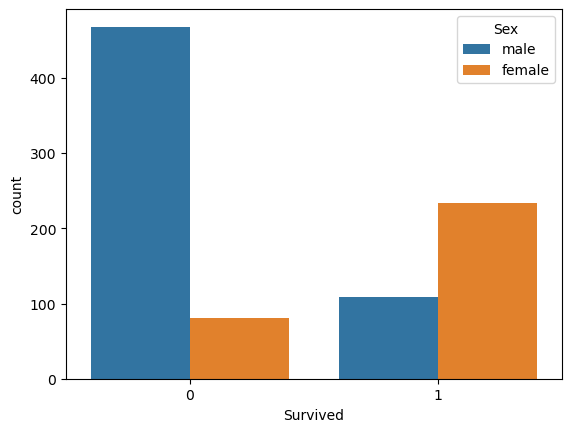

In [327]:
sns.countplot(x='Survived', hue='Sex', data=df)

In both the cases, females were the most survivied in number. Most of the male counterparts were not survived.

# Barplots

Text(0.5, 1.0, 'Survival by SibSp')

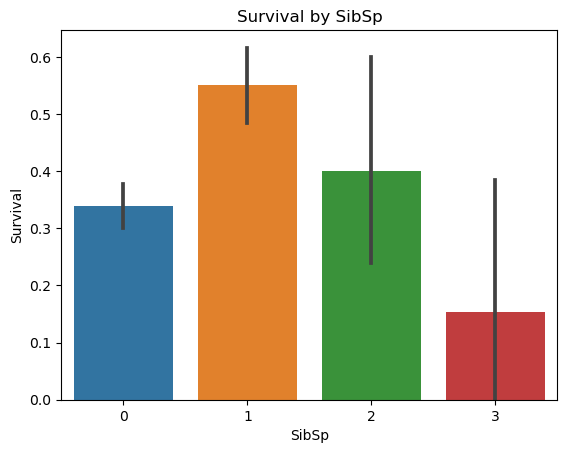

In [106]:
sns.barplot(x = 'SibSp', y ='Survived', data =df)
plt.ylabel('Survival')
plt.title('Survival by SibSp')


The siblings/spouses who were in class 1 were the most survived and class 3 had lowest survival rate

Text(0.5, 1.0, 'Survival by Parch')

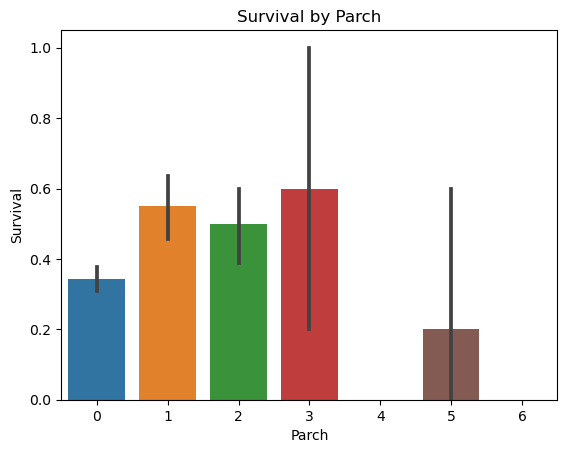

In [59]:
sns.barplot(x = 'Parch', y ='Survived', data =df)
plt.ylabel('Survival')
plt.title('Survival by Parch')


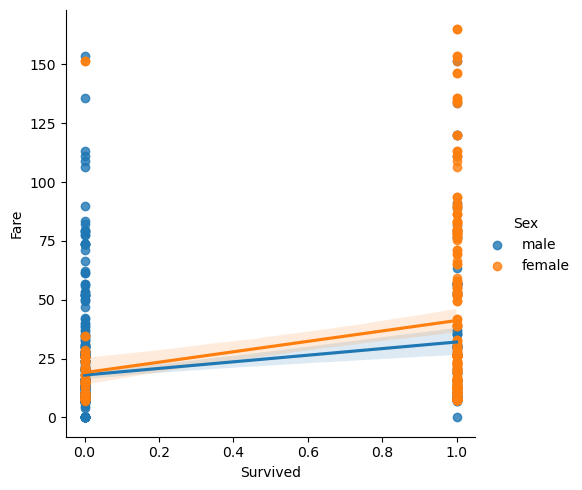

In [107]:
sns.lmplot(x='Survived', y='Fare', hue='Sex',data=df)

This shows survival and fare relationship with hue as sex.

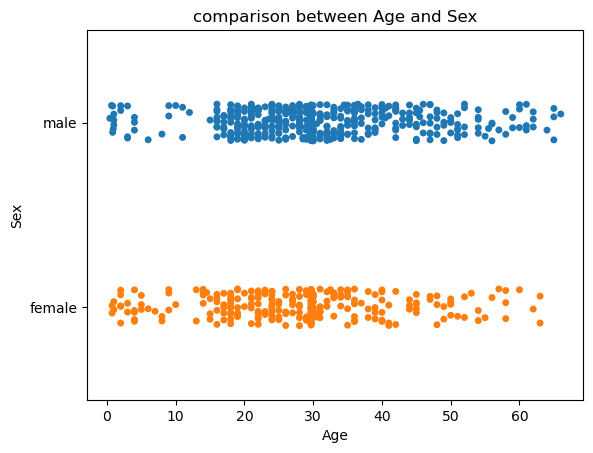

In [123]:
plt.title("comparison between Age and Sex")
sns.stripplot(x='Age', y='Sex', data=df)
plt.show()

This shows the age and sex of the passengers, which indicates that children and old passengers were less. Again
they had a high chance of survival rate.

# Multivariate Analysis

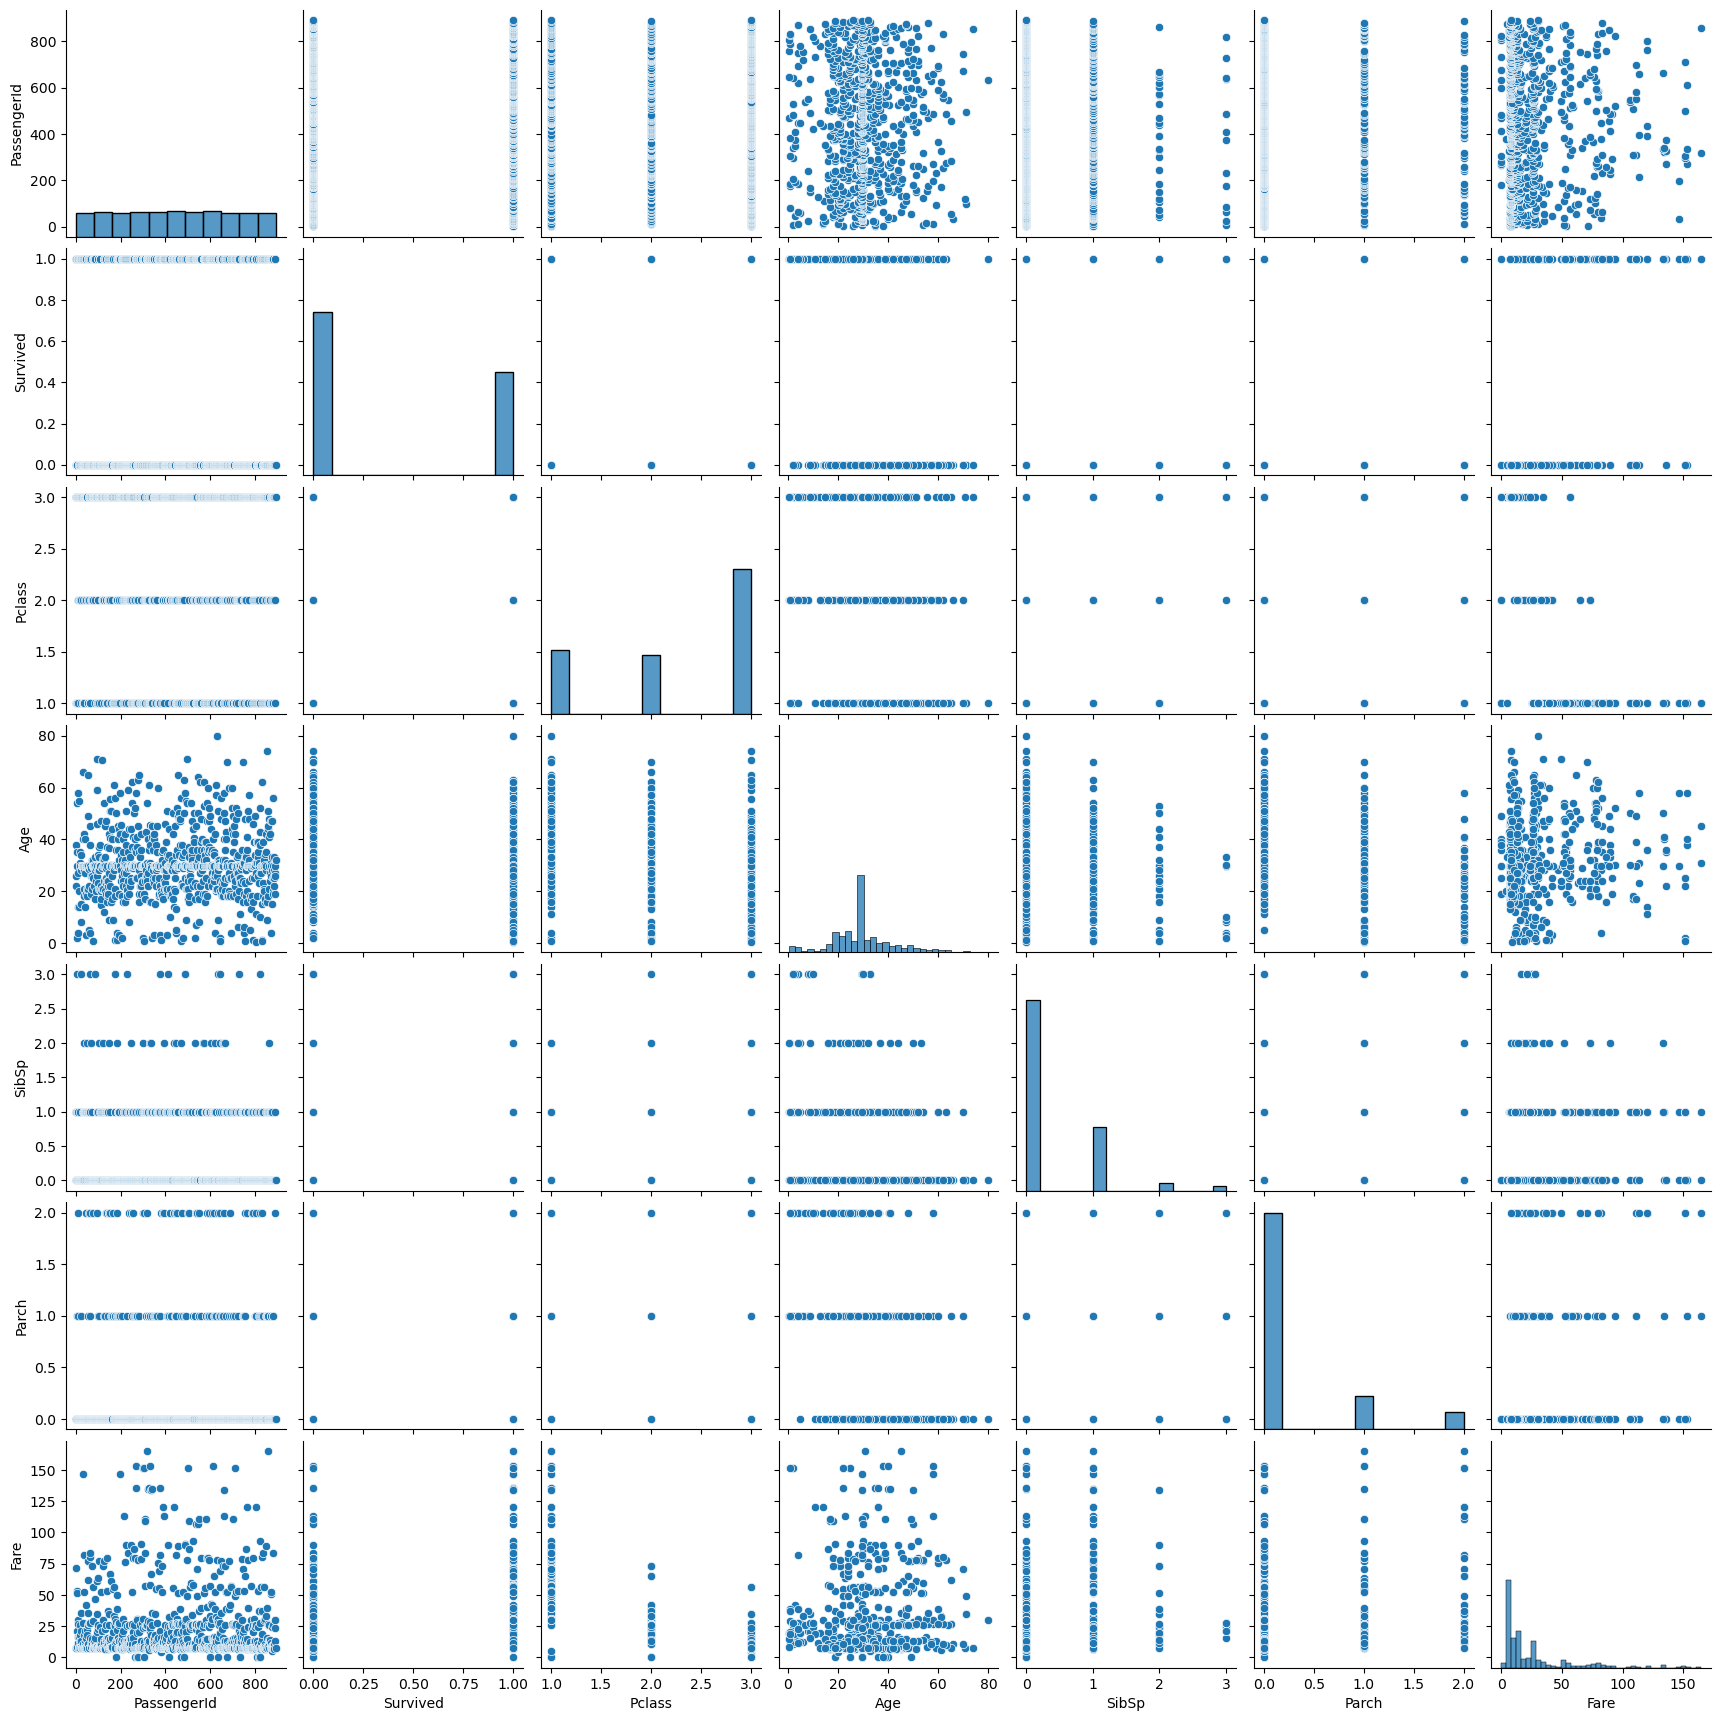

In [108]:
sns.pairplot(df)

The pairplot shows pairwise relationships with each feature and the results. The diagonal column
shows distribution of data

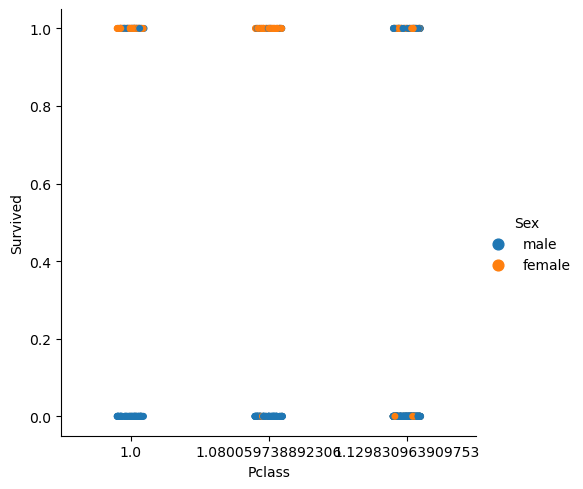

In [49]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df)

We cn see that Females were more survived in all three classes where as very few males survived.

In [33]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
dtype: float64

In [37]:
#Apply cbrt or sqrt as boxcox and log methods are giving Nan values.

In [34]:
df['Parch']=np.cbrt(df['Parch'])
df['SibSp']=np.cbrt(df['SibSp'])
df['Pclass']=np.cbrt(df['Pclass'])
df['Fare']=np.cbrt(df['Fare'])

In [36]:
df.skew() #Sqrt method also did not remove the outliers completely though

PassengerId    0.003454
Survived       0.450825
Pclass        -0.790973
Age            0.318314
SibSp          1.018770
Parch          1.643259
Fare           0.708623
dtype: float64

There is reduction in skewness though not totally in all the columns. 

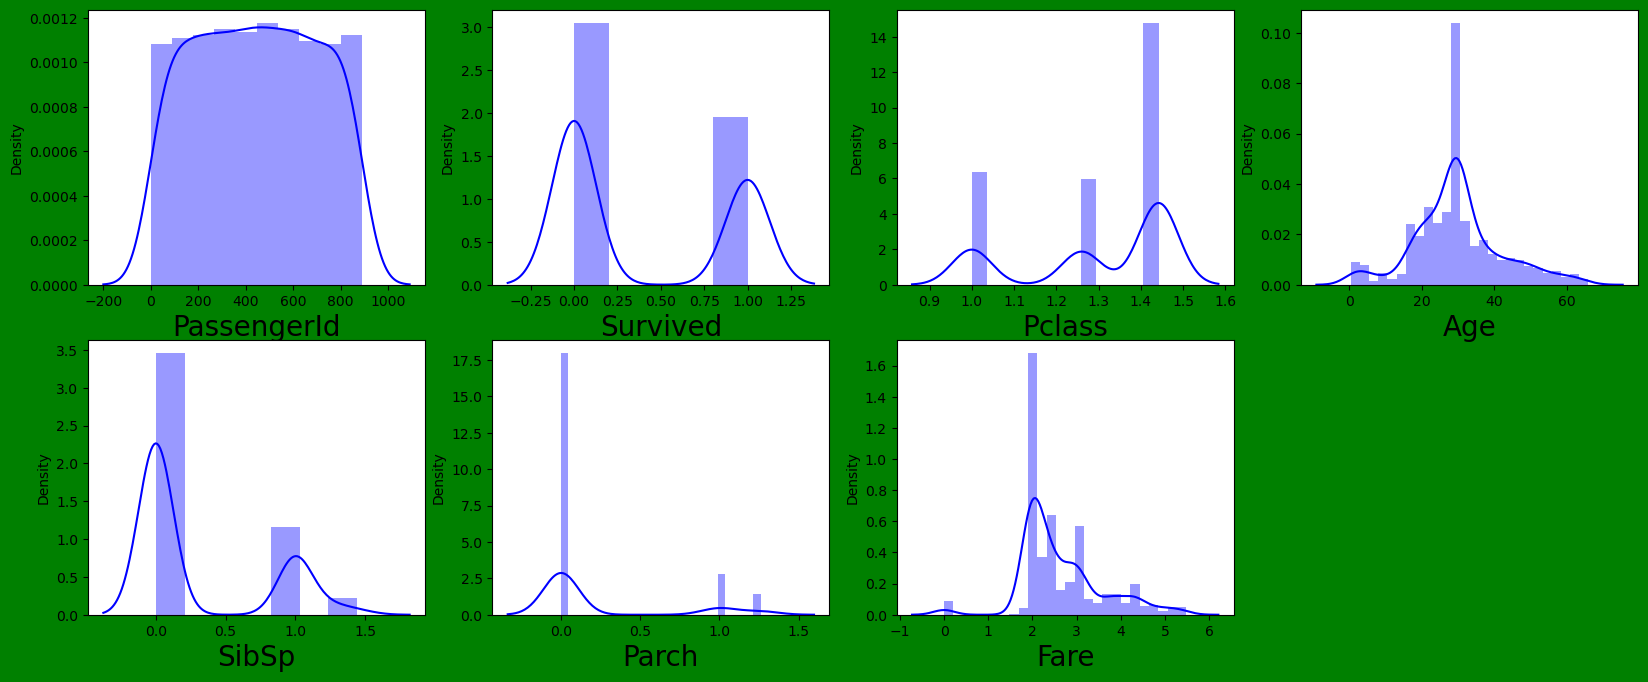

In [124]:
plt.figure (figsize=(20, 25), facecolor='green')
plotnumber=1
for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()


The plot shows normalizaiton of the columns to some degree and some reduction on skewness, which 
is accepted as agreable.

# Correlation with the variables.

In [41]:
df.corr()

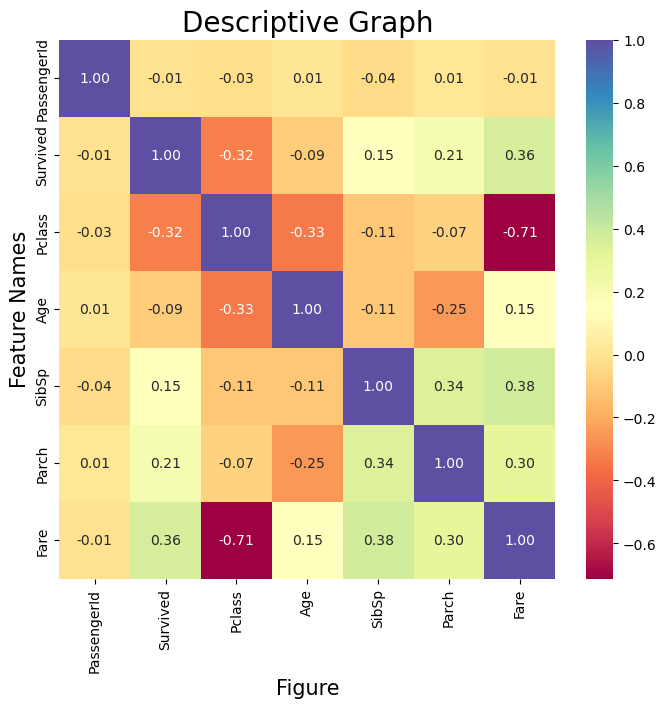

In [37]:
corr_hmap=df.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr_hmap, annot=True, fmt='0.2f', cmap='Spectral')
plt.xlabel("Figure", fontsize=15)
plt.ylabel("Feature Names", fontsize=15)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

We can drop the Cabin, Name along with PassengerID and Ticket as there is no contribution to data

In [42]:
df=df.drop(['PassengerId','Cabin','Name', 'Ticket'], axis=1)

In [44]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.442250,male,22.000000,1.0,0.000000,1.935438,S
1,1,1.000000,female,38.000000,1.0,0.000000,4.146318,C
2,1,1.442250,female,26.000000,0.0,0.000000,1.993730,S
3,1,1.000000,female,35.000000,1.0,0.000000,3.758647,S
4,0,1.442250,male,35.000000,0.0,0.000000,2.004158,S
...,...,...,...,...,...,...,...,...
886,0,1.259921,male,27.000000,0.0,0.000000,2.351335,S
887,1,1.000000,female,19.000000,0.0,0.000000,3.107233,S
888,0,1.442250,female,29.699118,1.0,1.259921,2.862294,S
889,1,1.000000,male,26.000000,0.0,0.000000,3.107233,C


In [45]:
x=df.iloc[:, 1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.442250,male,22.000000,1.0,0.000000,1.935438,S
1,1.000000,female,38.000000,1.0,0.000000,4.146318,C
2,1.442250,female,26.000000,0.0,0.000000,1.993730,S
3,1.000000,female,35.000000,1.0,0.000000,3.758647,S
4,1.442250,male,35.000000,0.0,0.000000,2.004158,S
...,...,...,...,...,...,...,...
886,1.259921,male,27.000000,0.0,0.000000,2.351335,S
887,1.000000,female,19.000000,0.0,0.000000,3.107233,S
888,1.442250,female,29.699118,1.0,1.259921,2.862294,S
889,1.000000,male,26.000000,0.0,0.000000,3.107233,C


In [46]:
features=df[['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']]

# Applying LabelEncoder to convert string columns into float datatype and scaling the data

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [48]:
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.442250,1,22.000000,1.0,0.000000,1.935438,2
1,1,1.000000,0,38.000000,1.0,0.000000,4.146318,0
2,1,1.442250,0,26.000000,0.0,0.000000,1.993730,2
3,1,1.000000,0,35.000000,1.0,0.000000,3.758647,2
4,0,1.442250,1,35.000000,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...,...
886,0,1.259921,1,27.000000,0.0,0.000000,2.351335,2
887,1,1.000000,0,19.000000,0.0,0.000000,3.107233,2
888,0,1.442250,0,29.699118,1.0,1.259921,2.862294,2
889,1,1.000000,1,26.000000,0.0,0.000000,3.107233,0


The Embarked and Sex columns have been encoded successfully into integers.

In [49]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.319102,-0.554888,-0.090926,0.145722,0.210930,0.363961,-0.154994
Pclass,-0.319102,1.000000,0.133356,-0.333099,-0.111449,-0.070930,-0.712223,0.139257
Sex,-0.554888,0.133356,1.000000,0.094544,-0.213195,-0.256155,-0.268761,0.116708
Age,-0.090926,-0.333099,0.094544,1.000000,-0.112739,-0.253006,0.147130,-0.008781
SibSp,0.145722,-0.111449,-0.213195,-0.112739,1.000000,0.342683,0.376512,-0.048905
Parch,0.210930,-0.070930,-0.256155,-0.253006,0.342683,1.000000,0.298984,-0.024873
Fare,0.363961,-0.712223,-0.268761,0.147130,0.376512,0.298984,1.000000,-0.194147
Embarked,-0.154994,0.139257,0.116708,-0.008781,-0.048905,-0.024873,-0.194147,1.000000


1. Survived and survived intersect as usual, value should be 1 only. Survived again has negative correlation
with Pclass, sex, age and embarked but +vely correlated with SibSp, Parch and Fare.
2. Pclass again with iteslf is 1. Pclass is positively related iwht Sex and Embarked and with others
negatively correlated.
3. Sex is positively correlated with Pclass and Embarked and with others negatively correlated.
4. Age is negatively correlated with Survived, Pclass, SibSp, PArch and Embarked. with others it is
+Vely correlated.
5. Similarly SibSp and Parch and Fare also show the variations resectively.

# Separating x and y data for scaling and training purposes.

In [50]:
x=df.iloc[:, 1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.442250,1,22.000000,1.0,0.000000,1.935438,2
1,1.000000,0,38.000000,1.0,0.000000,4.146318,0
2,1.442250,0,26.000000,0.0,0.000000,1.993730,2
3,1.000000,0,35.000000,1.0,0.000000,3.758647,2
4,1.442250,1,35.000000,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...
886,1.259921,1,27.000000,0.0,0.000000,2.351335,2
887,1.000000,0,19.000000,0.0,0.000000,3.107233,2
888,1.442250,0,29.699118,1.0,1.259921,2.862294,2
889,1.000000,1,26.000000,0.0,0.000000,3.107233,0


In [51]:
st=StandardScaler() #scaling applied and we can see the uniformity in the values
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6
0,0.798183,0.722036,-0.641702,1.454211,-0.480921,-0.766275,0.583162
1,-1.656644,-1.384973,0.675821,1.454211,-0.480921,1.623850,-1.953669
2,0.798183,-1.384973,-0.312321,-0.627757,-0.480921,-0.703257,0.583162
3,-1.656644,-1.384973,0.428785,1.454211,-0.480921,1.204749,0.583162
4,0.798183,0.722036,0.428785,-0.627757,-0.480921,-0.691984,0.583162
...,...,...,...,...,...,...,...
815,-0.213881,0.722036,-0.229976,-0.627757,-0.480921,-0.316660,0.583162
816,-1.656644,-1.384973,-0.888737,-0.627757,-0.480921,0.500522,0.583162
817,0.798183,-1.384973,-0.007717,1.454211,2.445624,0.235725,0.583162
818,-1.656644,0.722036,-0.312321,-0.627757,-0.480921,0.500522,-1.953669


# Applying Variance_Inflation_Factor to reduce multicollilnearity factor.

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

,VIF values,features
0,2.381552,0
1,1.139620,1
2,1.244679,2
3,1.311762,3
4,1.315484,4
5,2.740889,5
6,1.048138,6


AS we assume the Threshold values to be either 5 or 10, here we note that no values are higher than
the threshold values. 
We have already dropped PassengerId and other columns.

# Splitting y from df

In [54]:
y=df.iloc[:, 0:1]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Installing imbalanced-learn for checking version of numpy and sklearn version

In [55]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# SMOTE Techniques applied since there is class difference in dataset. There is just either suvived or not.

In [56]:
import numpy
numpy.__version__

'1.21.5'

In [57]:
import sklearn
sklearn.__version__

'1.0.2'

In [58]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x1,y1=smt.fit_resample(x, y)

In [59]:
x1.shape

(1000, 7)

In [60]:
x1

,0,1,2,3,4,5,6
0,0.798183,0.722036,-0.641702,1.454211,-0.480921,-0.766275,0.583162
1,-1.656644,-1.384973,0.675821,1.454211,-0.480921,1.623850,-1.953669
2,0.798183,-1.384973,-0.312321,-0.627757,-0.480921,-0.703257,0.583162
3,-1.656644,-1.384973,0.428785,1.454211,-0.480921,1.204749,0.583162
4,0.798183,0.722036,0.428785,-0.627757,-0.480921,-0.691984,0.583162
...,...,...,...,...,...,...,...
995,0.798183,-1.384973,-1.860614,-0.627757,-0.480921,-0.383557,0.583162
996,-0.213881,0.722036,-2.265820,1.649917,1.841879,0.511666,0.583162
997,0.431541,-1.384973,-0.207560,-0.627757,-0.480921,-0.586343,-1.953669
998,-0.213881,-1.384973,0.492313,1.454211,1.841879,0.655177,0.583162


In [61]:
x=x1
x

,0,1,2,3,4,5,6
0,0.798183,0.722036,-0.641702,1.454211,-0.480921,-0.766275,0.583162
1,-1.656644,-1.384973,0.675821,1.454211,-0.480921,1.623850,-1.953669
2,0.798183,-1.384973,-0.312321,-0.627757,-0.480921,-0.703257,0.583162
3,-1.656644,-1.384973,0.428785,1.454211,-0.480921,1.204749,0.583162
4,0.798183,0.722036,0.428785,-0.627757,-0.480921,-0.691984,0.583162
...,...,...,...,...,...,...,...
995,0.798183,-1.384973,-1.860614,-0.627757,-0.480921,-0.383557,0.583162
996,-0.213881,0.722036,-2.265820,1.649917,1.841879,0.511666,0.583162
997,0.431541,-1.384973,-0.207560,-0.627757,-0.480921,-0.586343,-1.953669
998,-0.213881,-1.384973,0.492313,1.454211,1.841879,0.655177,0.583162


In [62]:
y1.shape

(1000, 1)

In [63]:
y1

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,1


In [65]:
y=y1
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,1


Smote has been successfully applied as there are 1000 rows now as compared to 820 rows before.

# Selecting the best accuracy score on best maximum random state

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
maxAcc=0
maxRS=0
for i in range(1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=i)
    rfr=RandomForestClassifier()   
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum Accuracy is:", maxAcc, "at Random_State", maxRS)

Maximum Accuracy is: 0.8733333333333333 at Random_State 75


# Splitting the data into training and testing on the basis of best accuracy and random state¶

In [67]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30, random_state=maxRS)

In [68]:
x_train.shape

(700, 7)

In [69]:
x_test.shape

(300, 7)

In [70]:
y_train.shape

(700, 1)

In [72]:
y_test.shape

(300, 1)

# Different algorithms being tested for the best score

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(x_train, y_train)
pred_rfr=rfr.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_rfr))
print("Confusion_Matrix:",  confusion_matrix(y_test, pred_rfr))
print("Classification_Report is:", classification_report(y_test, pred_rfr))

Accuracy_Score is: 0.8633333333333333
Confusion_Matrix: [[127  21]
 [ 20 132]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.86      0.86      0.86       148
           1       0.86      0.87      0.87       152

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Accuracy score for RandomForestClassifier is 86% on random state of maxRS of 75

# Auc_Roc_Curves for the respective RandomForestClassifer

In [107]:
pred_rfr_prob=rfr.predict_proba(x_test)[:,1]
pred_rfr_prob


array([0.7       , 0.98      , 0.07      , 0.55      , 0.98      ,
       0.51      , 0.16598843, 0.7       , 0.575     , 0.76956349,
       0.        , 0.2       , 1.        , 0.02      , 1.        ,
       0.91      , 0.96      , 0.215     , 0.03      , 0.04      ,
       0.76      , 0.98      , 0.25      , 0.15      , 0.62      ,
       0.12      , 0.88      , 1.        , 0.97      , 0.75      ,
       0.86      , 1.        , 0.99      , 0.33      , 0.        ,
       0.12454834, 0.97      , 0.93      , 0.94      , 0.08      ,
       1.        , 0.66      , 0.98      , 0.39      , 0.88      ,
       1.        , 0.29      , 0.50666667, 0.97      , 0.33      ,
       0.76956349, 0.11      , 0.        , 0.09342857, 0.48      ,
       0.52      , 0.01      , 0.91      , 0.19      , 0.88      ,
       0.4455    , 0.81      , 0.96      , 0.03      , 0.51316667,
       0.99      , 0.97      , 0.24      , 0.90318254, 0.03      ,
       0.        , 1.        , 1.        , 0.18      , 0.99   

In [122]:
fpr, tpr,thresholds=roc_curve(y_test, pred_etc_prob)
fpr

array([0.        , 0.00675676, 0.00675676, 0.01351351, 0.02702703,
       0.02702703, 0.02702703, 0.02702703, 0.03378378, 0.03378378,
       0.03378378, 0.03378378, 0.04054054, 0.04054054, 0.04054054,
       0.04054054, 0.05405405, 0.05405405, 0.05405405, 0.05405405,
       0.05405405, 0.05405405, 0.06081081, 0.07432432, 0.08108108,
       0.08108108, 0.08783784, 0.08783784, 0.09459459, 0.09459459,
       0.10135135, 0.10135135, 0.10810811, 0.11486486, 0.11486486,
       0.13513514, 0.13513514, 0.14864865, 0.15540541, 0.16891892,
       0.17567568, 0.2027027 , 0.2027027 , 0.22297297, 0.22972973,
       0.25      , 0.25      , 0.26351351, 0.27027027, 0.28378378,
       0.2972973 , 0.31756757, 0.33108108, 0.35810811, 0.39189189,
       0.39864865, 0.41216216, 0.42567568, 0.43918919, 0.46621622,
       0.48648649, 0.49324324, 0.5       , 0.54054054, 0.55405405,
       0.58783784, 0.59459459, 1.        ])

In [123]:
tpr

array([0.        , 0.34868421, 0.42763158, 0.46710526, 0.48684211,
       0.52631579, 0.54605263, 0.55263158, 0.59868421, 0.61184211,
       0.61842105, 0.63157895, 0.64473684, 0.66447368, 0.67105263,
       0.68421053, 0.69736842, 0.70394737, 0.71710526, 0.76315789,
       0.77631579, 0.78289474, 0.78947368, 0.78947368, 0.79605263,
       0.80263158, 0.80263158, 0.82894737, 0.83552632, 0.84210526,
       0.84868421, 0.85526316, 0.85526316, 0.86184211, 0.86842105,
       0.86842105, 0.88157895, 0.88157895, 0.88157895, 0.88815789,
       0.89473684, 0.89473684, 0.90789474, 0.90789474, 0.91447368,
       0.91447368, 0.92105263, 0.92105263, 0.92763158, 0.93421053,
       0.93421053, 0.93421053, 0.93421053, 0.93421053, 0.93421053,
       0.94078947, 0.94078947, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.96052632, 0.96052632, 0.96052632, 0.96052632,
       0.96052632, 0.96052632, 1.        ])

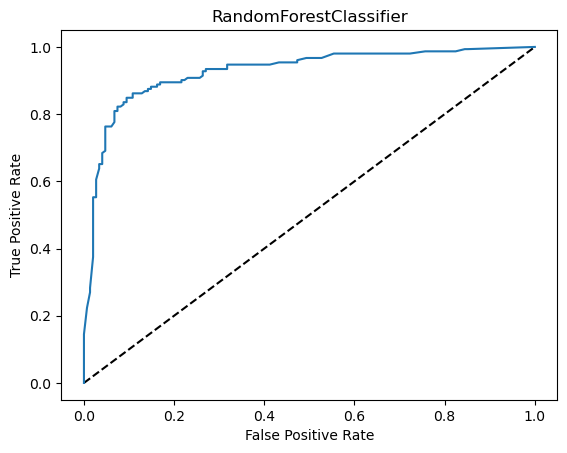

In [116]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.show()

In [124]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.96      , 0.95      , 0.93      , 0.92      , 0.91      ,
       0.9       , 0.88      , 0.87      , 0.86      , 0.85      ,
       0.84      , 0.82      , 0.81      , 0.8       , 0.8       ,
       0.76      , 0.75      , 0.74      , 0.73      , 0.72      ,
       0.705     , 0.7       , 0.68      , 0.66      , 0.65      ,
       0.63      , 0.62      , 0.6       , 0.58      , 0.56      ,
       0.52      , 0.51      , 0.5       , 0.47      , 0.42      ,
       0.39      , 0.35      , 0.32      , 0.31      , 0.3       ,
       0.27      , 0.245     , 0.23      , 0.22      , 0.2       ,
       0.18      , 0.175     , 0.17      , 0.16666667, 0.13      ,
       0.12      , 0.11      , 0.1       , 0.09      , 0.08      ,
       0.06      , 0.05      , 0.04333333, 0.03      , 0.02      ,
       0.01      , 0.005     , 0.        ])

In [117]:
auc_score=roc_auc_score(y_test, rfr.predict(x_test))

In [121]:
print(auc_score)

0.8632645803698435


The auc_score gives exact value of accuracy score for RandomForestClassifer and the graph
is also indicative of this result.

In [115]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier() #n_estimators=100, random_state=42)default
ad.fit(x_train, y_train)
pred_ad=ad.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_ad))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_ad))
print("Classification_Report is:", classification_report(y_test, pred_ad))

Accuracy_Score is: 0.8633333333333333
Confusion_Matrix is: [[129  19]
 [ 22 130]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.85      0.87      0.86       148
           1       0.87      0.86      0.86       152

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Accuracy score for AdaBoostForestClassifier is 86% on random state of maxRS of 75

# Auc_Roc_Curve

In [125]:
pred_ad_prob=ad.predict_proba(x_test)[:,1]
pred_ad_prob

array([0.50626511, 0.51568416, 0.49146784, 0.50039651, 0.5194302 ,
       0.49795254, 0.49038904, 0.50374035, 0.49612404, 0.50521574,
       0.49177603, 0.49552176, 0.5219075 , 0.48951164, 0.51192185,
       0.51017858, 0.69303084, 0.49281932, 0.48578131, 0.49155109,
       0.68766512, 0.5104832 , 0.49852613, 0.48964819, 0.49795254,
       0.50037416, 0.51557889, 0.51192185, 0.51568416, 0.51110331,
       0.50037416, 0.51574406, 0.51235991, 0.49389083, 0.49146784,
       0.49294278, 0.50980672, 0.50914958, 0.51344603, 0.49059323,
       0.51213277, 0.50086124, 0.50956973, 0.49130517, 0.50159808,
       0.51625792, 0.50039651, 0.49529451, 0.51235991, 0.50270131,
       0.50521574, 0.48846161, 0.49281486, 0.49373466, 0.48842865,
       0.49142425, 0.49177603, 0.50464632, 0.48924673, 0.68855712,
       0.49391322, 0.50195486, 0.51568416, 0.48981979, 0.49753438,
       0.50650519, 0.53418385, 0.50489492, 0.50764184, 0.49402174,
       0.49146784, 0.53664852, 0.51276857, 0.48570397, 0.51192

In [ ]:
fpr, tpr,thresholds=roc_curve(y_test, pred_etc_prob)
#fpr, tpr, thresholds can be checked as previously done.

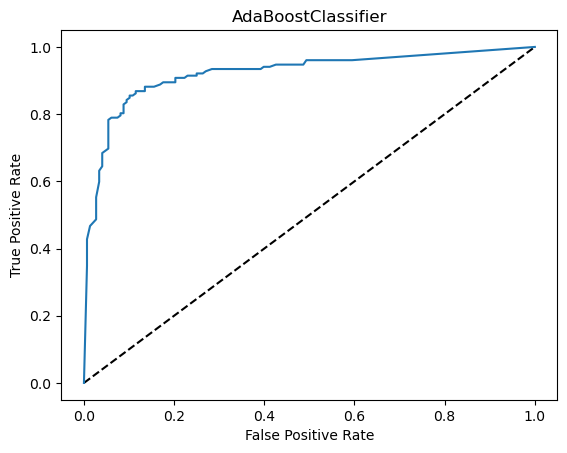

In [127]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='AdaBoostClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier')
plt.show()

In [ ]:
auc_score=roc_auc_score(y_test,ad.predict(x_test))

In [128]:
print(auc_score)

0.8632645803698435


We can see that auc_score is same as accuracy score of 86% and graph is also showing the pattern.

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train, y_train)
pred_etc=etc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_etc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_etc))
print("Classification_Report is:", classification_report(y_test, pred_etc))


Accuracy_Score is: 0.8733333333333333
Confusion_Matrix is: [[128  20]
 [ 18 134]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.88      0.86      0.87       148
           1       0.87      0.88      0.88       152

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



<AxesSubplot:>

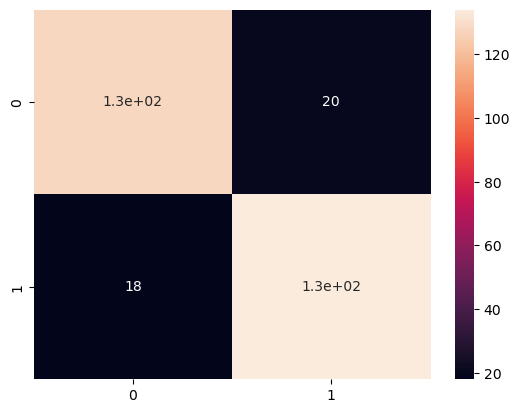

In [90]:
p=confusion_matrix(y_test, pred_etc)
sns.heatmap(p, annot=True)

Accuracy score for ExtraTreeClassifier is 87% on random state of maxRS of 75

# Auc_Roc_Curve

In [92]:
pred_etc_prob=etc.predict_proba(x_test)[:,1]
pred_etc_prob

array([0.83      , 1.        , 0.09      , 0.39      , 0.99      ,
       0.47      , 0.16666667, 0.76      , 0.58      , 0.8       ,
       0.        , 0.05      , 1.        , 0.        , 1.        ,
       0.95      , 1.        , 0.        , 0.        , 0.        ,
       0.69      , 1.        , 0.17      , 0.17      , 0.7       ,
       0.1       , 0.81      , 1.        , 0.99      , 0.68      ,
       0.87      , 1.        , 1.        , 0.32      , 0.        ,
       0.03      , 1.        , 1.        , 0.96      , 0.19      ,
       1.        , 0.82      , 1.        , 0.38      , 0.87      ,
       1.        , 0.22      , 0.5       , 1.        , 0.31      ,
       0.8       , 0.03      , 0.        , 0.        , 0.53      ,
       0.55      , 0.        , 0.82      , 0.1       , 1.        ,
       0.245     , 0.83      , 1.        , 0.        , 0.5       ,
       1.        , 0.93      , 0.24      , 0.92      , 0.        ,
       0.        , 0.96      , 1.        , 0.22      , 0.97   

In [93]:
fpr, tpr,thresholds=roc_curve(y_test, pred_etc_prob)

In [94]:
fpr

array([0.        , 0.00675676, 0.00675676, 0.01351351, 0.02702703,
       0.02702703, 0.02702703, 0.02702703, 0.03378378, 0.03378378,
       0.03378378, 0.03378378, 0.04054054, 0.04054054, 0.04054054,
       0.04054054, 0.05405405, 0.05405405, 0.05405405, 0.05405405,
       0.05405405, 0.05405405, 0.06081081, 0.07432432, 0.08108108,
       0.08108108, 0.08783784, 0.08783784, 0.09459459, 0.09459459,
       0.10135135, 0.10135135, 0.10810811, 0.11486486, 0.11486486,
       0.13513514, 0.13513514, 0.14864865, 0.15540541, 0.16891892,
       0.17567568, 0.2027027 , 0.2027027 , 0.22297297, 0.22972973,
       0.25      , 0.25      , 0.26351351, 0.27027027, 0.28378378,
       0.2972973 , 0.31756757, 0.33108108, 0.35810811, 0.39189189,
       0.39864865, 0.41216216, 0.42567568, 0.43918919, 0.46621622,
       0.48648649, 0.49324324, 0.5       , 0.54054054, 0.55405405,
       0.58783784, 0.59459459, 1.        ])

In [96]:
tpr

array([0.        , 0.34868421, 0.42763158, 0.46710526, 0.48684211,
       0.52631579, 0.54605263, 0.55263158, 0.59868421, 0.61184211,
       0.61842105, 0.63157895, 0.64473684, 0.66447368, 0.67105263,
       0.68421053, 0.69736842, 0.70394737, 0.71710526, 0.76315789,
       0.77631579, 0.78289474, 0.78947368, 0.78947368, 0.79605263,
       0.80263158, 0.80263158, 0.82894737, 0.83552632, 0.84210526,
       0.84868421, 0.85526316, 0.85526316, 0.86184211, 0.86842105,
       0.86842105, 0.88157895, 0.88157895, 0.88157895, 0.88815789,
       0.89473684, 0.89473684, 0.90789474, 0.90789474, 0.91447368,
       0.91447368, 0.92105263, 0.92105263, 0.92763158, 0.93421053,
       0.93421053, 0.93421053, 0.93421053, 0.93421053, 0.93421053,
       0.94078947, 0.94078947, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.96052632, 0.96052632, 0.96052632, 0.96052632,
       0.96052632, 0.96052632, 1.        ])

In [98]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.96      , 0.95      , 0.93      , 0.92      , 0.91      ,
       0.9       , 0.88      , 0.87      , 0.86      , 0.85      ,
       0.84      , 0.82      , 0.81      , 0.8       , 0.8       ,
       0.76      , 0.75      , 0.74      , 0.73      , 0.72      ,
       0.705     , 0.7       , 0.68      , 0.66      , 0.65      ,
       0.63      , 0.62      , 0.6       , 0.58      , 0.56      ,
       0.52      , 0.51      , 0.5       , 0.47      , 0.42      ,
       0.39      , 0.35      , 0.32      , 0.31      , 0.3       ,
       0.27      , 0.245     , 0.23      , 0.22      , 0.2       ,
       0.18      , 0.175     , 0.17      , 0.16666667, 0.13      ,
       0.12      , 0.11      , 0.1       , 0.09      , 0.08      ,
       0.06      , 0.05      , 0.04333333, 0.03      , 0.02      ,
       0.01      , 0.005     , 0.        ])

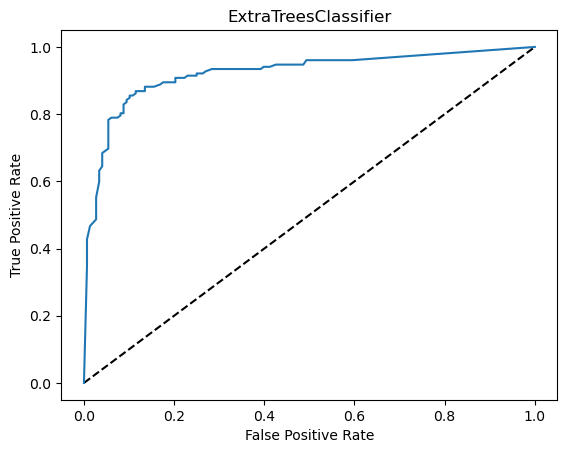

In [99]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='ExtraTreesClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ExtraTreesClassifier')
plt.show()

In [ ]:
We can see that the curve is covering 87% of the data which is the accuracy of the ETCclassifier.

In [101]:
auc_score=roc_auc_score(y_test, etc.predict(x_test))

In [102]:
print(auc_score)

0.873221906116643


In [80]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_svc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_svc))
print("Classification_Report is:", classification_report(y_test, pred_svc))


Accuracy_Score is: 0.81
Confusion_Matrix is: [[136  12]
 [ 45 107]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.75      0.92      0.83       148
           1       0.90      0.70      0.79       152

    accuracy                           0.81       300
   macro avg       0.83      0.81      0.81       300
weighted avg       0.83      0.81      0.81       300



Accuracy score for SupportVectorClassifier with Kernel linear is 81% on random state of maxRS of 75
Am going to plot auc_roc curve for rbf which has highest score.

In [81]:
from sklearn.svm import SVC
svc=SVC(kernel='poly') #poly method is good as compared to rbf and linear which had just 76 and 79%.
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_svc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_svc))
print("Classification_Report is:", classification_report(y_test, pred_svc))


Accuracy_Score is: 0.85
Confusion_Matrix is: [[137  11]
 [ 34 118]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.80      0.93      0.86       148
           1       0.91      0.78      0.84       152

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



Accuracy score for SupportVectorClassifier with Kernel poly is 85% on random state of maxRS of 75

In [82]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf') 
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_svc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_svc))
print("Classification_Report is:", classification_report(y_test, pred_svc))


Accuracy_Score is: 0.8533333333333334
Confusion_Matrix is: [[135  13]
 [ 31 121]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.81      0.91      0.86       148
           1       0.90      0.80      0.85       152

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



Accuracy score for SupportVectorClassifier with Kernel rbf is 85% on random state of maxRS of 75

In [135]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print("Accuracy Score is:", accuracy_score(y_test, pred_lg))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_lg))
print("Classification_Report is:", classification_report(y_test, pred_lg))



Accuracy Score is: 0.8333333333333334
Confusion_Matrix is: [[127  21]
 [ 29 123]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.81      0.86      0.84       148
           1       0.85      0.81      0.83       152

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



Accuracy score for LogisticRegression is 83% on random state of maxRS of 75

# Auc_Roc_Curve

In [136]:
pred_lg_prob=lg.predict_proba(x_test)[:,1]
pred_lg_prob

array([0.61892533, 0.95226625, 0.14292299, 0.41135898, 0.9326145 ,
       0.35187452, 0.15881501, 0.65224379, 0.2621705 , 0.692816  ,
       0.14340447, 0.37942939, 0.9697342 , 0.18563802, 0.79628024,
       0.96321239, 0.85254629, 0.11266361, 0.16719766, 0.15210948,
       0.60249472, 0.78330263, 0.33040082, 0.11749837, 0.37009032,
       0.61855116, 0.94143391, 0.79628024, 0.95020433, 0.67964055,
       0.57597856, 0.94515694, 0.79167833, 0.41398127, 0.1461818 ,
       0.14895935, 0.81378678, 0.78957273, 0.85931743, 0.25272377,
       0.82961178, 0.61558714, 0.84777229, 0.21020554, 0.78557833,
       0.8997293 , 0.38823295, 0.1365806 , 0.78984219, 0.62611931,
       0.692816  , 0.09953227, 0.17138374, 0.18254703, 0.19732819,
       0.20796037, 0.14219251, 0.72923871, 0.1153256 , 0.66851367,
       0.1405078 , 0.64768921, 0.95198053, 0.17380296, 0.25119983,
       0.87242794, 0.85267584, 0.71586674, 0.69209756, 0.12572447,
       0.1461818 , 0.92712261, 0.93018721, 0.15544721, 0.83282

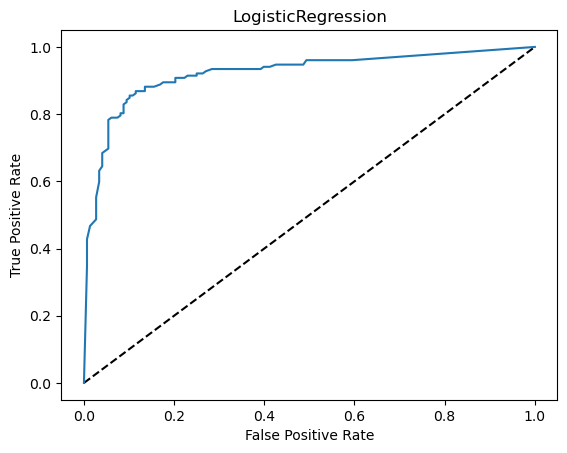

In [137]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()

In [138]:
print(auc_score)

0.8632645803698435


We can see auc_score is 86% and accuracy is 83% for logisitc regression.

In [86]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train, y_train)
pred_bc=bc.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_bc))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_bc))
print("Classification_Report is:", classification_report(y_test, pred_bc))


Accuracy_Score is: 0.86
Confusion_Matrix is: [[127  21]
 [ 21 131]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.86      0.86      0.86       148
           1       0.86      0.86      0.86       152

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Accuracy score for BaggingClassifier is 86% on random state of maxRS of 75

Aoc_curve for BaggingClassifer

In [140]:
pred_bc_prob=bc.predict_proba(x_test)[:,1]
pred_bc_prob #we can draw tpr, fpr and thresholds similarly like we did for others

array([0.7       , 1.        , 0.1       , 0.6       , 1.        ,
       0.6       , 0.12428571, 0.8       , 0.4       , 0.78738095,
       0.        , 0.2       , 1.        , 0.        , 1.        ,
       1.        , 1.        , 0.2       , 0.1       , 0.        ,
       1.        , 0.9       , 0.2       , 0.        , 0.5       ,
       0.3       , 1.        , 1.        , 1.        , 0.9       ,
       0.6       , 1.        , 1.        , 0.1       , 0.        ,
       0.15      , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.3       , 1.        , 0.2       , 1.        ,
       1.        , 0.1       , 0.54166667, 1.        , 0.3       ,
       0.78738095, 0.5       , 0.        , 0.        , 0.8       ,
       0.9       , 0.        , 0.8       , 0.1       , 1.        ,
       0.56666667, 0.7       , 1.        , 0.        , 0.55833333,
       1.        , 1.        , 0.4       , 0.875     , 0.1       ,
       0.        , 1.        , 1.        , 0.4       , 1.     

In [142]:
fpr, tpr,thresholds=roc_curve(y_test, pred_etc_prob)
fpr

array([0.        , 0.00675676, 0.00675676, 0.01351351, 0.02702703,
       0.02702703, 0.02702703, 0.02702703, 0.03378378, 0.03378378,
       0.03378378, 0.03378378, 0.04054054, 0.04054054, 0.04054054,
       0.04054054, 0.05405405, 0.05405405, 0.05405405, 0.05405405,
       0.05405405, 0.05405405, 0.06081081, 0.07432432, 0.08108108,
       0.08108108, 0.08783784, 0.08783784, 0.09459459, 0.09459459,
       0.10135135, 0.10135135, 0.10810811, 0.11486486, 0.11486486,
       0.13513514, 0.13513514, 0.14864865, 0.15540541, 0.16891892,
       0.17567568, 0.2027027 , 0.2027027 , 0.22297297, 0.22972973,
       0.25      , 0.25      , 0.26351351, 0.27027027, 0.28378378,
       0.2972973 , 0.31756757, 0.33108108, 0.35810811, 0.39189189,
       0.39864865, 0.41216216, 0.42567568, 0.43918919, 0.46621622,
       0.48648649, 0.49324324, 0.5       , 0.54054054, 0.55405405,
       0.58783784, 0.59459459, 1.        ])

In [143]:
tpr

array([0.        , 0.34868421, 0.42763158, 0.46710526, 0.48684211,
       0.52631579, 0.54605263, 0.55263158, 0.59868421, 0.61184211,
       0.61842105, 0.63157895, 0.64473684, 0.66447368, 0.67105263,
       0.68421053, 0.69736842, 0.70394737, 0.71710526, 0.76315789,
       0.77631579, 0.78289474, 0.78947368, 0.78947368, 0.79605263,
       0.80263158, 0.80263158, 0.82894737, 0.83552632, 0.84210526,
       0.84868421, 0.85526316, 0.85526316, 0.86184211, 0.86842105,
       0.86842105, 0.88157895, 0.88157895, 0.88157895, 0.88815789,
       0.89473684, 0.89473684, 0.90789474, 0.90789474, 0.91447368,
       0.91447368, 0.92105263, 0.92105263, 0.92763158, 0.93421053,
       0.93421053, 0.93421053, 0.93421053, 0.93421053, 0.93421053,
       0.94078947, 0.94078947, 0.94736842, 0.94736842, 0.94736842,
       0.94736842, 0.96052632, 0.96052632, 0.96052632, 0.96052632,
       0.96052632, 0.96052632, 1.        ])

In [144]:
thresholds

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.96      , 0.95      , 0.93      , 0.92      , 0.91      ,
       0.9       , 0.88      , 0.87      , 0.86      , 0.85      ,
       0.84      , 0.82      , 0.81      , 0.8       , 0.8       ,
       0.76      , 0.75      , 0.74      , 0.73      , 0.72      ,
       0.705     , 0.7       , 0.68      , 0.66      , 0.65      ,
       0.63      , 0.62      , 0.6       , 0.58      , 0.56      ,
       0.52      , 0.51      , 0.5       , 0.47      , 0.42      ,
       0.39      , 0.35      , 0.32      , 0.31      , 0.3       ,
       0.27      , 0.245     , 0.23      , 0.22      , 0.2       ,
       0.18      , 0.175     , 0.17      , 0.16666667, 0.13      ,
       0.12      , 0.11      , 0.1       , 0.09      , 0.08      ,
       0.06      , 0.05      , 0.04333333, 0.03      , 0.02      ,
       0.01      , 0.005     , 0.        ])

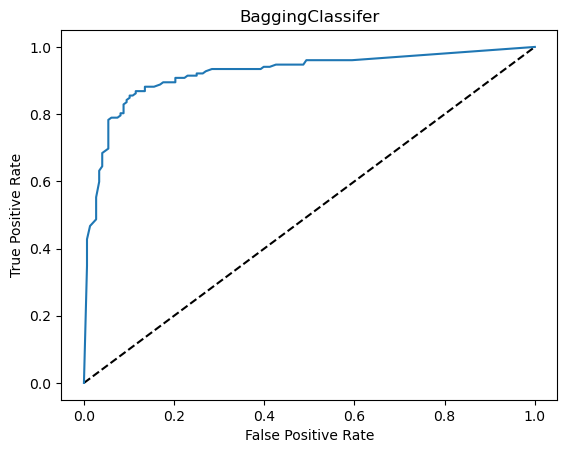

In [145]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='BaggingClassifer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BaggingClassifer')
plt.show()

In [147]:
print(auc_score)

0.8632645803698435


The area is covered in the graph and is 86% score similar to accuracy score.

In [84]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train, y_train)
pred_gb=gb.predict(x_test)
print("Accuracy_Score is:", accuracy_score(y_test, pred_gb))
print("Confusion_Matrix is:", confusion_matrix(y_test, pred_bc))
print("Classification_Report is:", classification_report(y_test, pred_bc))


Accuracy_Score is: 0.84
Confusion_Matrix is: [[128  20]
 [ 26 126]]
Classification_Report is:               precision    recall  f1-score   support

           0       0.83      0.86      0.85       148
           1       0.86      0.83      0.85       152

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



Accuracy score for GaussianNBClassifier is 84% on random state of maxRS of 75

In [149]:
pred_gb_prob=gb.predict_proba(x_test)[:,1]
pred_gb_prob #we can draw tpr, fpr and thresholds similarly like we did for others

array([0.69494136, 0.99117022, 0.02407485, 0.73728694, 0.99396745,
       0.36059477, 0.0358868 , 0.66147831, 0.04062808, 0.55633377,
       0.02364494, 0.67898809, 0.9985185 , 0.028966  , 0.85085749,
       0.9975891 , 0.99727375, 0.05805052, 0.0259243 , 0.06499587,
       0.89612785, 0.98690927, 0.89873899, 0.1723191 , 0.38689867,
       0.47808787, 0.98336133, 0.85085749, 0.99192564, 0.74430457,
       0.30906949, 0.99984378, 0.61376039, 0.99674801, 0.02428258,
       0.03514278, 0.63004963, 0.63516809, 0.99752992, 0.10226221,
       0.6469337 , 0.7117454 , 0.66571023, 0.46641806, 0.99882476,
       0.99863561, 0.6915899 , 0.02367288, 0.63215895, 0.45722459,
       0.55633377, 0.05778769, 0.09396915, 0.04746965, 0.68671084,
       0.70373584, 0.02356511, 0.49778112, 0.04702116, 0.97993081,
       0.02386068, 0.84646479, 0.99127229, 0.02691564, 0.04921987,
       0.98208778, 0.9843083 , 0.48824458, 0.5553149 , 0.02349948,
       0.02428258, 0.98216323, 0.984186  , 0.68709692, 0.97998

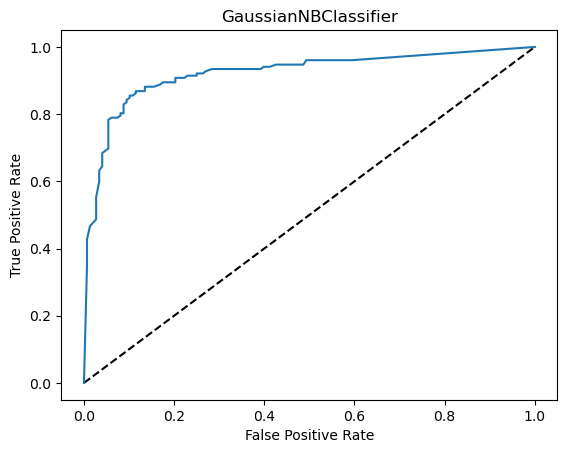

In [150]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='GaussianNBClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNBClassifier')
plt.show()

In [151]:
print(auc_score)

0.8632645803698435


The curve has covered 86% and accuracy score is around 84 to 85%

# ExtraTreesClassifiers give 87% score and best score compared to others.


# Cross_Validation Method

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
score=cross_val_score(rfr, x, y, cv=5)
print(score)
print(score.mean())
print(score.std())
print("The difference between Accuracy Score and Cross_Val_Score is:" ,(accuracy_score(y_test, pred_rf)-score.mean())*100)

[0.755 0.835 0.775 0.86  0.835]
0.8119999999999999
0.039949968710876346
The difference between Accuracy Score and Cross_Val_Score is: 5.800000000000005


In [154]:
score=cross_val_score(ad, x, y, cv=5)
print(score)
print(score.mean())
print(score.std())
print("The difference between Accuracy Score and Cross_Val_Score is:" ,(accuracy_score(y_test, pred_rf)-score.mean())*100)

[0.735 0.82  0.79  0.84  0.83 ]
0.8029999999999999
0.03789459064299282
The difference between Accuracy Score and Cross_Val_Score is: 6.700000000000006


In [156]:
score=cross_val_score(etc, x, y, cv=5)
print(score)
print(score.mean())
print(score.std())
print("The difference between Accuracy Score and Cross_Val_Score is:" ,(accuracy_score(y_test, pred_rf)-score.mean())*100)

[0.745 0.805 0.785 0.86  0.845]
0.808
0.04142463035441595
The difference between Accuracy Score and Cross_Val_Score is: 6.199999999999994


In [160]:
score=cross_val_score(bc, x, y, cv=5)
print(score)
print(score.mean())
print(score.std())
print("The difference between Accuracy Score and Cross_Val_Score is:" ,(accuracy_score(y_test, pred_rf)-score.mean())*100)

[0.76  0.81  0.805 0.86  0.845]
0.8160000000000001
0.03484250278036868
The difference between Accuracy Score and Cross_Val_Score is: 5.399999999999993


In [161]:
score=cross_val_score(lg, x, y, cv=5)
print(score)
print(score.mean())
print(score.std())
print("The difference between Accuracy Score and Cross_Val_Score is:" ,(accuracy_score(y_test, pred_rf)-score.mean())*100)

[0.77  0.81  0.725 0.82  0.82 ]
0.7889999999999999
0.03693237062523877
The difference between Accuracy Score and Cross_Val_Score is: 8.100000000000007


In [162]:
score=cross_val_score(svc, x, y, cv=5)
print(score)
print(score.mean())
print(score.std())
print("The difference between Accuracy Score and Cross_Val_Score is:" ,(accuracy_score(y_test, pred_rf)-score.mean())*100)

[0.775 0.825 0.745 0.855 0.84 ]
0.808
0.04142463035441595
The difference between Accuracy Score and Cross_Val_Score is: 6.199999999999994


In [163]:
score=cross_val_score(gb, x, y, cv=5)
print(score)
print(score.mean())
print(score.std())
print("The difference between Accuracy Score and Cross_Val_Score is:" ,(accuracy_score(y_test, pred_rf)-score.mean())*100)

[0.705 0.78  0.77  0.82  0.82 ]
0.7789999999999999
0.04223742416388575
The difference between Accuracy Score and Cross_Val_Score is: 9.100000000000009


# RandomForestClassifier gives us 81 accuracy and 5.8 difference between
the classifier and cross_val_score


# Hyperparameter Tuning




In [167]:
#for RandomTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters={'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

In [171]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [173]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [174]:
mymodel=RandomForestClassifier(bootstrap=True, max_depth=90,max_features=2,min_samples_leaf=3, 
min_samples_split=12, n_estimators=200)
mymodel.fit(x_train, y_train)
pred=mymodel.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)


87.66666666666667


In [175]:
pred #predicted values of target variable

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], d

mymodel for RandomForestClassifier gives 81% accuracy score, which is good estimation.

# Saving the model

In [176]:
import joblib
filename='rfcfile'
joblib.dump(mymodel, "rfcfile.obj")

['rfcfile.obj']

# Loading the saved model

In [177]:
import joblib
mymodel=joblib.load('rfcfile.obj')
result=mymodel.score(x_test, y_test)                               
print(result*100)

87.66666666666667


# The machine has learned the model and is ready to predict new values upon its learning 

In [178]:
def predict(p):
    p=p.reshape(1, -1) 
    pred=rf.predict(p)
    print("Survival Status=", pred)
    if (pred==0):
        print("Dead")
    else:
        print("Survived")

In [180]:
p=np.array([0.798183,0.722036,-0.641702,1.454211,0.480921,0.766275,0.583162])
predict(p) 

Survival Status= [0]
Dead


In [181]:
p=np.array([0.362573,-1.384973,-2.088472,1.454211,2.101742,0.124046,0.583162])
predict(p)

Survival Status= [1]
Survived


In [183]:
df1=pd.DataFrame(pred) 
df1

,0
0,1
1,1
2,0
3,0
4,1
...,...
295,0
296,1
297,1
298,0
